## Predicting Wine Quality

In [1377]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy 
from scipy.stats.stats import pearsonr

pd.options.display.float_format = '{:,.4f}'.format

wineWhite = pd.read_csv('./processeddata/wine_quality_white.csv', skipinitialspace=True, index_col=0)
wineRed = pd.read_csv('./processeddata/wine_quality_red.csv', skipinitialspace=True, index_col=0)

### Data Preprocessing

In [1378]:
wineWhite.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.0000,0.2700,0.3600,20.7000,0.0450,45.0000,170.0000,1.0010,3.0000,0.4500,8.8000,6
2,6.3000,0.3000,0.3400,1.6000,0.0490,14.0000,132.0000,0.9940,3.3000,0.4900,9.5000,6
3,8.1000,0.2800,0.4000,6.9000,0.0500,30.0000,97.0000,0.9951,3.2600,0.4400,10.1000,6
4,7.2000,0.2300,0.3200,8.5000,0.0580,47.0000,186.0000,0.9956,3.1900,0.4000,9.9000,6
5,7.2000,0.2300,0.3200,8.5000,0.0580,47.0000,186.0000,0.9956,3.1900,0.4000,9.9000,6


In [1379]:
wineWhite.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4894,6.2000,0.2100,0.2900,1.6000,0.0390,24.0000,92.0000,0.9911,3.2700,0.5000,11.2000,6
4895,6.6000,0.3200,0.3600,8.0000,0.0470,57.0000,168.0000,0.9949,3.1500,0.4600,9.6000,5
4896,6.5000,0.2400,0.1900,1.2000,0.0410,30.0000,111.0000,0.9925,2.9900,0.4600,9.4000,6
4897,5.5000,0.2900,0.3000,1.1000,0.0220,20.0000,110.0000,0.9887,3.3400,0.3800,12.8000,7
4898,6.0000,0.2100,0.3800,0.8000,0.0200,22.0000,98.0000,0.9894,3.2600,0.3200,11.8000,6


In [1380]:
wineRed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4000,0.7000,0.0000,1.9000,0.0760,11.0000,34.0000,0.9978,3.5100,0.5600,9.4000,5
2,7.8000,0.8800,0.0000,2.6000,0.0980,25.0000,67.0000,0.9968,3.2000,0.6800,9.8000,5
3,7.8000,0.7600,0.0400,2.3000,0.0920,15.0000,54.0000,0.9970,3.2600,0.6500,9.8000,5
4,11.2000,0.2800,0.5600,1.9000,0.0750,17.0000,60.0000,0.9980,3.1600,0.5800,9.8000,6
5,7.4000,0.7000,0.0000,1.9000,0.0760,11.0000,34.0000,0.9978,3.5100,0.5600,9.4000,5


In [1381]:
wineRed.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1595,6.2000,0.6000,0.0800,2.0000,0.0900,32.0000,44.0000,0.9949,3.4500,0.5800,10.5000,5
1596,5.9000,0.5500,0.1000,2.2000,0.0620,39.0000,51.0000,0.9951,3.5200,0.7600,11.2000,6
1597,6.3000,0.5100,0.1300,2.3000,0.0760,29.0000,40.0000,0.9957,3.4200,0.7500,11.0000,6
1598,5.9000,0.6450,0.1200,2.0000,0.0750,32.0000,44.0000,0.9955,3.5700,0.7100,10.2000,5
1599,6.0000,0.3100,0.4700,3.6000,0.0670,18.0000,42.0000,0.9955,3.3900,0.6600,11.0000,6


### Shape

In [1382]:
wineWhite.shape

(4898, 12)

In [1383]:
wineRed.shape

(1599, 12)

### Datatypes

In [1384]:
wineWhite.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [1385]:
wineRed.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### Dropping duplicate rows


In [1386]:
duplicate_rows_df = wineRed[wineRed.duplicated()]
duplicate_rows_df.shape

(240, 12)

In [1387]:
wineRed.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [1388]:
wineRed = wineRed.drop_duplicates()
wineRed

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4000,0.7000,0.0000,1.9000,0.0760,11.0000,34.0000,0.9978,3.5100,0.5600,9.4000,5
2,7.8000,0.8800,0.0000,2.6000,0.0980,25.0000,67.0000,0.9968,3.2000,0.6800,9.8000,5
3,7.8000,0.7600,0.0400,2.3000,0.0920,15.0000,54.0000,0.9970,3.2600,0.6500,9.8000,5
4,11.2000,0.2800,0.5600,1.9000,0.0750,17.0000,60.0000,0.9980,3.1600,0.5800,9.8000,6
6,7.4000,0.6600,0.0000,1.8000,0.0750,13.0000,40.0000,0.9978,3.5100,0.5600,9.4000,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.8000,0.6200,0.0800,1.9000,0.0680,28.0000,38.0000,0.9965,3.4200,0.8200,9.5000,6
1595,6.2000,0.6000,0.0800,2.0000,0.0900,32.0000,44.0000,0.9949,3.4500,0.5800,10.5000,5
1596,5.9000,0.5500,0.1000,2.2000,0.0620,39.0000,51.0000,0.9951,3.5200,0.7600,11.2000,6
1598,5.9000,0.6450,0.1200,2.0000,0.0750,32.0000,44.0000,0.9955,3.5700,0.7100,10.2000,5


In [1389]:
duplicate_rows_df = wineWhite[wineWhite.duplicated()]
duplicate_rows_df.shape

(937, 12)

In [1390]:
wineWhite.count()

fixed acidity           4898
volatile acidity        4898
citric acid             4898
residual sugar          4898
chlorides               4898
free sulfur dioxide     4898
total sulfur dioxide    4898
density                 4898
pH                      4898
sulphates               4898
alcohol                 4898
quality                 4898
dtype: int64

In [1391]:
wineWhite = wineWhite.drop_duplicates()
wineWhite


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.0000,0.2700,0.3600,20.7000,0.0450,45.0000,170.0000,1.0010,3.0000,0.4500,8.8000,6
2,6.3000,0.3000,0.3400,1.6000,0.0490,14.0000,132.0000,0.9940,3.3000,0.4900,9.5000,6
3,8.1000,0.2800,0.4000,6.9000,0.0500,30.0000,97.0000,0.9951,3.2600,0.4400,10.1000,6
4,7.2000,0.2300,0.3200,8.5000,0.0580,47.0000,186.0000,0.9956,3.1900,0.4000,9.9000,6
7,6.2000,0.3200,0.1600,7.0000,0.0450,30.0000,136.0000,0.9949,3.1800,0.4700,9.6000,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4894,6.2000,0.2100,0.2900,1.6000,0.0390,24.0000,92.0000,0.9911,3.2700,0.5000,11.2000,6
4895,6.6000,0.3200,0.3600,8.0000,0.0470,57.0000,168.0000,0.9949,3.1500,0.4600,9.6000,5
4896,6.5000,0.2400,0.1900,1.2000,0.0410,30.0000,111.0000,0.9925,2.9900,0.4600,9.4000,6
4897,5.5000,0.2900,0.3000,1.1000,0.0220,20.0000,110.0000,0.9887,3.3400,0.3800,12.8000,7


### Replace invalid data with NaN

In [1392]:
wineRed['fixed acidity'] = wineRed['fixed acidity'].mask(wineRed['fixed acidity'] < 0, np.NaN)

In [1393]:
wineWhite['fixed acidity'] = wineWhite['fixed acidity'].mask(wineWhite['fixed acidity'] < 0, np.NaN)

In [1394]:
wineRed['volatile acidity'] = wineRed['volatile acidity'].mask(wineRed['volatile acidity'] < 0, np.NaN)
wineWhite['volatile acidity'] = wineWhite['volatile acidity'].mask(wineWhite['volatile acidity'] < 0, np.NaN)

In [1395]:
wineRed['citric acid'] = wineRed['citric acid'].mask(wineRed['citric acid'] < 0, np.NaN)
wineWhite['citric acid'] = wineWhite['citric acid'].mask(wineWhite['citric acid'] < 0, np.NaN)

In [1396]:
wineRed['residual sugar'] = wineRed['residual sugar'].mask(wineRed['residual sugar'] < 0, np.NaN)
wineWhite['residual sugar'] = wineWhite['residual sugar'].mask(wineWhite['residual sugar'] < 0, np.NaN)

In [1397]:
wineRed['chlorides'] = wineRed['chlorides'].mask(wineRed['chlorides'] < 0, np.NaN)
wineWhite['chlorides'] = wineWhite['chlorides'].mask(wineWhite['chlorides'] < 0, np.NaN)

In [1398]:
wineRed['free sulfur dioxide'] = wineRed['free sulfur dioxide'].mask(wineRed['free sulfur dioxide'] < 0, np.NaN)
wineWhite['free sulfur dioxide'] = wineWhite['free sulfur dioxide'].mask(wineWhite['free sulfur dioxide'] < 0, np.NaN)

In [1399]:
wineRed['total sulfur dioxide'] = wineRed['total sulfur dioxide'].mask(wineRed['total sulfur dioxide'] < 0, np.NaN)
wineWhite['total sulfur dioxide'] = wineWhite['total sulfur dioxide'].mask(wineWhite['total sulfur dioxide'] < 0, np.NaN)

In [1400]:
wineRed['density'] = wineRed['density'].mask(wineRed['density'] < 0, np.NaN)
wineWhite['density'] = wineWhite['density'].mask(wineWhite['density'] < 0, np.NaN)

In [1401]:
wineRed['pH'] = wineRed['pH'].mask(wineRed['pH'] < 0, np.NaN)
wineRed['pH'] = wineRed['pH'].mask(wineRed['pH'] > 14, np.NaN)
wineWhite['pH'] = wineWhite['pH'].mask(wineWhite['pH'] < 0, np.NaN)
wineWhite['pH'] = wineWhite['pH'].mask(wineWhite['pH'] > 14, np.NaN)

In [1402]:
wineRed['sulphates'] = wineRed['sulphates'].mask(wineRed['sulphates'] < 0, np.NaN)
wineWhite['sulphates'] = wineWhite['sulphates'].mask(wineWhite['sulphates'] < 0, np.NaN)

In [1403]:
wineRed['alcohol'] = wineRed['alcohol'].mask(wineRed['alcohol'] < 0, np.NaN)
wineWhite['alcohol'] = wineWhite['alcohol'].mask(wineWhite['alcohol'] < 0, np.NaN)

In [1404]:
wineRed['quality'] = wineRed['quality'].mask(wineRed['quality'] < 0, np.NaN)
wineRed['quality'] = wineRed['quality'].mask(wineRed['quality'] > 10, np.NaN)
wineWhite['quality'] = wineWhite['quality'].mask(wineWhite['quality'] < 0, np.NaN)
wineWhite['quality'] = wineWhite['quality'].mask(wineWhite['quality'] > 10, np.NaN)

### Analizing Missing Values

In [1405]:
wineRed.isnull().values.any()

False

In [1406]:
wineWhite.isnull().values.any()

False

### Normalize Data

In [1407]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler() 
# data_scaled_Red = scaler.fit_transform(wineRed)

In [1408]:
# print('means : ', data_scaled_Red.mean(axis=0))
# print('std : ', data_scaled_Red.std(axis=0))

In [1409]:
# print('Min : ', data_scaled_Red.min(axis=0))
# print('Max : ', data_scaled_Red.max(axis=0))

In [1410]:
# print('Quartile : ', data_scaled_Red.quantile([0.25,0.5,0.75]))

In [1411]:
# data_scaled_White = scaler.fit_transform(wineWhite)

In [1412]:
# print('means : ', data_scaled_White.mean(axis=0))
# print('std : ', data_scaled_White.std(axis=0))

In [1413]:
# print('Min : ', data_scaled_White.min(axis=0))
# print('Max : ', data_scaled_White.max(axis=0))

In [1414]:
# print('Quartile : ', data_scaled_White.quantile([0.25,0.5,0.75], axis=0))

In [1415]:
# data_scaled_White = pd.DataFrame({'fixed acidity': wineWhite.iloc[:,0], 'volatile acidity': wineWhite.iloc[:,1], 'citric acid': wineWhite.iloc[:,2], 'residual sugar': wineWhite.iloc[:,3], 'chlorides': wineWhite.iloc[:,4],'free sulfur dioxide': wineWhite.iloc[:,5], 'total sulfur dioxide': wineWhite.iloc[:,6], 'density': wineWhite.iloc[:,7], 'pH': wineWhite.iloc[:,8], 'sulphates': wineWhite.iloc[:,9], 'alcohol': wineWhite.iloc[:,10], 'quality':wineWhite.iloc[:,11]})

In [1416]:
# data_scaled_White.head()

In [1417]:
# data_scaled_Red = pd.DataFrame({'fixed acidity': wineRed.iloc[:,0], 'volatile acidity': wineRed.iloc[:,1], 'citric acid': wineRed.iloc[:,2], 'residual sugar': wineRed.iloc[:,3], 'chlorides': wineRed.iloc[:,4],'free sulfur dioxide': wineRed.iloc[:,5], 'total sulfur dioxide': wineRed.iloc[:,6], 'density': wineRed.iloc[:,7], 'pH': wineRed.iloc[:,8], 'sulphates': wineRed.iloc[:,9], 'alcohol': wineRed.iloc[:,10], 'quality':wineRed.iloc[:,11]})

In [1418]:
# data_scaled_Red.head()

### Classify quality into (High, Medium, Low)

In [1419]:
wineWhite["quality"].value_counts()

6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: quality, dtype: int64

In [1420]:
wineWhite['Categorical Quality'] = data_scaled_White['quality']

In [1421]:
wineWhite

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Categorical Quality
1,7.0000,0.2700,0.3600,20.7000,0.0450,45.0000,170.0000,1.0010,3.0000,0.4500,8.8000,6,6
2,6.3000,0.3000,0.3400,1.6000,0.0490,14.0000,132.0000,0.9940,3.3000,0.4900,9.5000,6,6
3,8.1000,0.2800,0.4000,6.9000,0.0500,30.0000,97.0000,0.9951,3.2600,0.4400,10.1000,6,6
4,7.2000,0.2300,0.3200,8.5000,0.0580,47.0000,186.0000,0.9956,3.1900,0.4000,9.9000,6,6
7,6.2000,0.3200,0.1600,7.0000,0.0450,30.0000,136.0000,0.9949,3.1800,0.4700,9.6000,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4894,6.2000,0.2100,0.2900,1.6000,0.0390,24.0000,92.0000,0.9911,3.2700,0.5000,11.2000,6,6
4895,6.6000,0.3200,0.3600,8.0000,0.0470,57.0000,168.0000,0.9949,3.1500,0.4600,9.6000,5,5
4896,6.5000,0.2400,0.1900,1.2000,0.0410,30.0000,111.0000,0.9925,2.9900,0.4600,9.4000,6,6
4897,5.5000,0.2900,0.3000,1.1000,0.0220,20.0000,110.0000,0.9887,3.3400,0.3800,12.8000,7,7


In [1422]:
cleanup_nums = {"Categorical Quality": {3: "Low", 4:"Low" , 5: "Medium", 6: "Medium",
                                  7: "Medium", 8: "High", 9:"High"}}

In [1423]:
wineWhite = wineWhite.replace(cleanup_nums)
 

In [1424]:
wineWhite

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Categorical Quality
1,7.0000,0.2700,0.3600,20.7000,0.0450,45.0000,170.0000,1.0010,3.0000,0.4500,8.8000,6,Medium
2,6.3000,0.3000,0.3400,1.6000,0.0490,14.0000,132.0000,0.9940,3.3000,0.4900,9.5000,6,Medium
3,8.1000,0.2800,0.4000,6.9000,0.0500,30.0000,97.0000,0.9951,3.2600,0.4400,10.1000,6,Medium
4,7.2000,0.2300,0.3200,8.5000,0.0580,47.0000,186.0000,0.9956,3.1900,0.4000,9.9000,6,Medium
7,6.2000,0.3200,0.1600,7.0000,0.0450,30.0000,136.0000,0.9949,3.1800,0.4700,9.6000,6,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4894,6.2000,0.2100,0.2900,1.6000,0.0390,24.0000,92.0000,0.9911,3.2700,0.5000,11.2000,6,Medium
4895,6.6000,0.3200,0.3600,8.0000,0.0470,57.0000,168.0000,0.9949,3.1500,0.4600,9.6000,5,Medium
4896,6.5000,0.2400,0.1900,1.2000,0.0410,30.0000,111.0000,0.9925,2.9900,0.4600,9.4000,6,Medium
4897,5.5000,0.2900,0.3000,1.1000,0.0220,20.0000,110.0000,0.9887,3.3400,0.3800,12.8000,7,Medium


In [1425]:
wineRed["quality"].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [1426]:
wineRed['Categorical Quality'] = wineRed['quality']

In [1427]:
cleanup_nums = {"Categorical Quality": {3: "Low", 4:"Low" , 5: "Medium", 6: "Medium",
                                  7: "Medium", 8: "High"}}

In [1428]:
wineRed = wineRed.replace(cleanup_nums)

In [1429]:
wineRed

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Categorical Quality
1,7.4000,0.7000,0.0000,1.9000,0.0760,11.0000,34.0000,0.9978,3.5100,0.5600,9.4000,5,Medium
2,7.8000,0.8800,0.0000,2.6000,0.0980,25.0000,67.0000,0.9968,3.2000,0.6800,9.8000,5,Medium
3,7.8000,0.7600,0.0400,2.3000,0.0920,15.0000,54.0000,0.9970,3.2600,0.6500,9.8000,5,Medium
4,11.2000,0.2800,0.5600,1.9000,0.0750,17.0000,60.0000,0.9980,3.1600,0.5800,9.8000,6,Medium
6,7.4000,0.6600,0.0000,1.8000,0.0750,13.0000,40.0000,0.9978,3.5100,0.5600,9.4000,5,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.8000,0.6200,0.0800,1.9000,0.0680,28.0000,38.0000,0.9965,3.4200,0.8200,9.5000,6,Medium
1595,6.2000,0.6000,0.0800,2.0000,0.0900,32.0000,44.0000,0.9949,3.4500,0.5800,10.5000,5,Medium
1596,5.9000,0.5500,0.1000,2.2000,0.0620,39.0000,51.0000,0.9951,3.5200,0.7600,11.2000,6,Medium
1598,5.9000,0.6450,0.1200,2.0000,0.0750,32.0000,44.0000,0.9955,3.5700,0.7100,10.2000,5,Medium


In [1430]:
wineRed["Categorical Quality"].value_counts()

Medium    1279
Low         63
High        17
Name: Categorical Quality, dtype: int64

### Save Changes to Dataset

In [1431]:
wineWhite.to_csv('./processeddata/WhiteWine.csv')

In [1432]:
wineRed.to_csv('./processeddata/RedWine.csv')

### Central Tendency and Dispersion

In [1433]:
wineRed.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,"1,359.0000","1,359.0000","1,359.0000","1,359.0000","1,359.0000","1,359.0000","1,359.0000","1,359.0000","1,359.0000","1,359.0000","1,359.0000","1,359.0000"
mean,8.3106,0.5295,0.2723,2.5234,0.0881,15.8933,46.8260,0.9967,3.3098,0.6587,10.4323,5.6233
std,1.7370,0.1830,0.1955,1.3523,0.0494,10.4473,33.4089,0.0019,0.1550,0.1707,1.0821,0.8236
min,4.6000,0.1200,0.0000,0.9000,0.0120,1.0000,6.0000,0.9901,2.7400,0.3300,8.4000,3.0000
25%,7.1000,0.3900,0.0900,1.9000,0.0700,7.0000,22.0000,0.9956,3.2100,0.5500,9.5000,5.0000
50%,7.9000,0.5200,0.2600,2.2000,0.0790,14.0000,38.0000,0.9967,3.3100,0.6200,10.2000,6.0000
75%,9.2000,0.6400,0.4300,2.6000,0.0910,21.0000,63.0000,0.9978,3.4000,0.7300,11.1000,6.0000
max,15.9000,1.5800,1.0000,15.5000,0.6110,72.0000,289.0000,1.0037,4.0100,2.0000,14.9000,8.0000


In [1434]:
wineWhite.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,"3,961.0000","3,961.0000","3,961.0000","3,961.0000","3,961.0000","3,961.0000","3,961.0000","3,961.0000","3,961.0000","3,961.0000","3,961.0000","3,961.0000"
mean,6.8393,0.2805,0.3343,5.9148,0.0459,34.8892,137.1935,0.9938,3.1955,0.4904,10.5894,5.8548
std,0.8669,0.1034,0.1224,4.8616,0.0231,17.2100,43.1291,0.0029,0.1515,0.1135,1.2171,0.8907
min,3.8000,0.0800,0.0000,0.6000,0.0090,2.0000,9.0000,0.9871,2.7200,0.2200,8.0000,3.0000
25%,6.3000,0.2100,0.2700,1.6000,0.0350,23.0000,106.0000,0.9916,3.0900,0.4100,9.5000,5.0000
50%,6.8000,0.2600,0.3200,4.7000,0.0420,33.0000,133.0000,0.9935,3.1800,0.4800,10.4000,6.0000
75%,7.3000,0.3300,0.3900,8.9000,0.0500,45.0000,166.0000,0.9957,3.2900,0.5500,11.4000,6.0000
max,14.2000,1.1000,1.6600,65.8000,0.3460,289.0000,440.0000,1.0390,3.8200,1.0800,14.2000,9.0000


### Boxplot

#### White Wine

In [1435]:
# fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=[16, 6])
# ax1.boxplot(data_scaled_White['fixed acidity'])
# ax1.set_xlabel('Fixed Acidity')
# ax2.boxplot(data_scaled_White['volatile acidity'])
# ax2.set_xlabel('Volatile Acidity')
# ax3.boxplot(data_scaled_White['citric acid'])
# ax3.set_xlabel('Citric Acid')
# ax4.boxplot(data_scaled_White['residual sugar'])
# ax4.set_xlabel('Residual Sugar')
# plt.show()

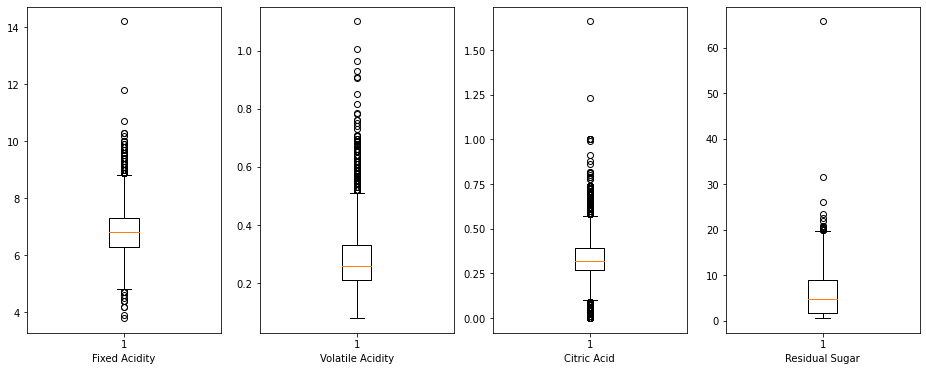

In [1436]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=[16, 6])
ax1.boxplot(wineWhite['fixed acidity'])
ax1.set_xlabel('Fixed Acidity')
ax2.boxplot(wineWhite['volatile acidity'])
ax2.set_xlabel('Volatile Acidity')
ax3.boxplot(wineWhite['citric acid'])
ax3.set_xlabel('Citric Acid')
ax4.boxplot(wineWhite['residual sugar'])
ax4.set_xlabel('Residual Sugar')
plt.show()

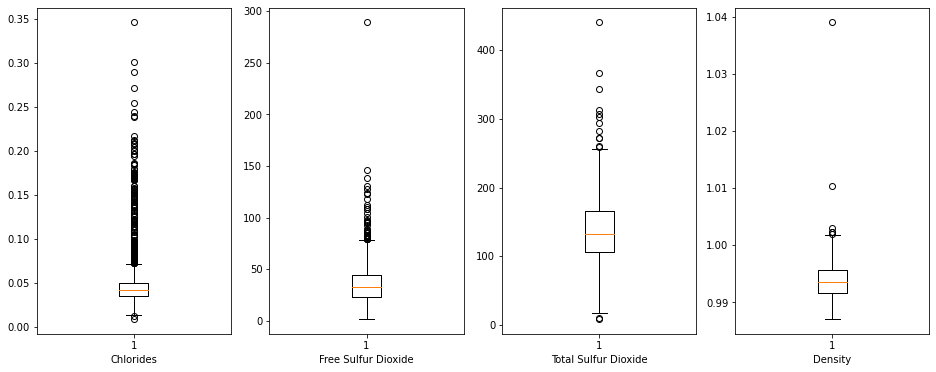

In [1437]:
fig, (ax5,ax6, ax7, ax8) = plt.subplots(1, 4, figsize=[16, 6])
ax5.boxplot(wineWhite['chlorides'])
ax5.set_xlabel('Chlorides')
ax6.boxplot(wineWhite['free sulfur dioxide'])
ax6.set_xlabel('Free Sulfur Dioxide')
ax7.boxplot(wineWhite['total sulfur dioxide'])
ax7.set_xlabel('Total Sulfur Dioxide')
ax8.boxplot(wineWhite['density'])
ax8.set_xlabel('Density')
plt.show()

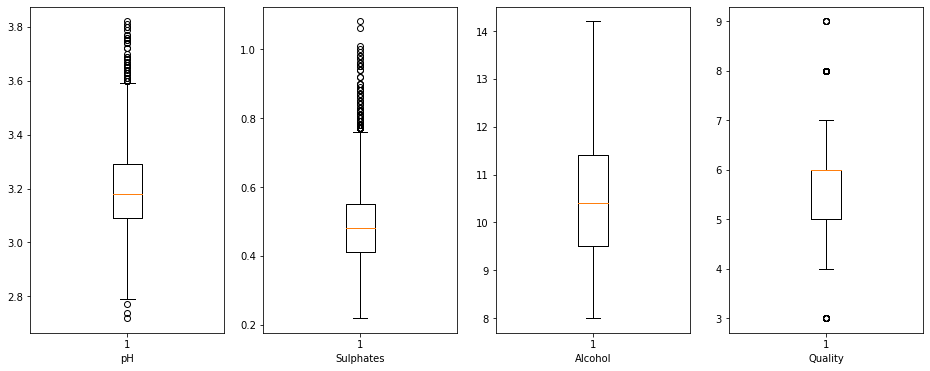

In [1438]:
fig, (ax9,ax10, ax11, ax12) = plt.subplots(1, 4, figsize=[16, 6])
ax9.boxplot(wineWhite['pH'])
ax9.set_xlabel('pH')
ax10.boxplot(wineWhite['sulphates'])
ax10.set_xlabel('Sulphates')
ax11.boxplot(wineWhite['alcohol'])
ax11.set_xlabel('Alcohol')
ax12.boxplot(wineWhite['quality'])
ax12.set_xlabel('Quality')
plt.show()

#### Red Wine

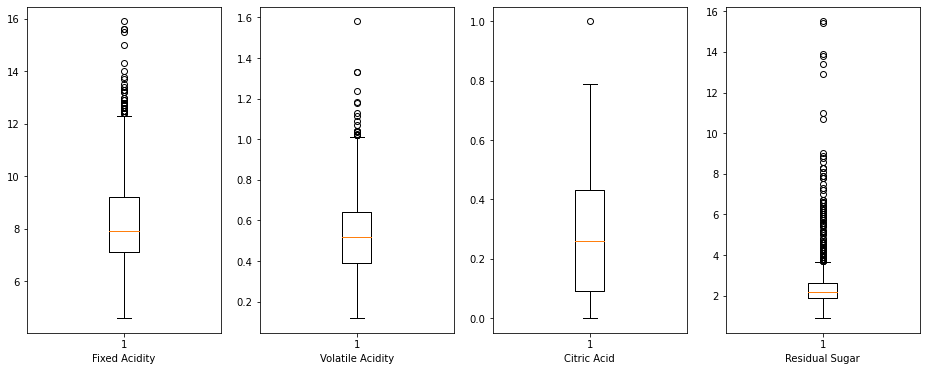

In [1439]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=[16, 6])
ax1.boxplot(wineRed['fixed acidity'])
ax1.set_xlabel('Fixed Acidity')
ax2.boxplot(wineRed['volatile acidity'])
ax2.set_xlabel('Volatile Acidity')
ax3.boxplot(wineRed['citric acid'])
ax3.set_xlabel('Citric Acid')
ax4.boxplot(wineRed['residual sugar'])
ax4.set_xlabel('Residual Sugar')
plt.show()

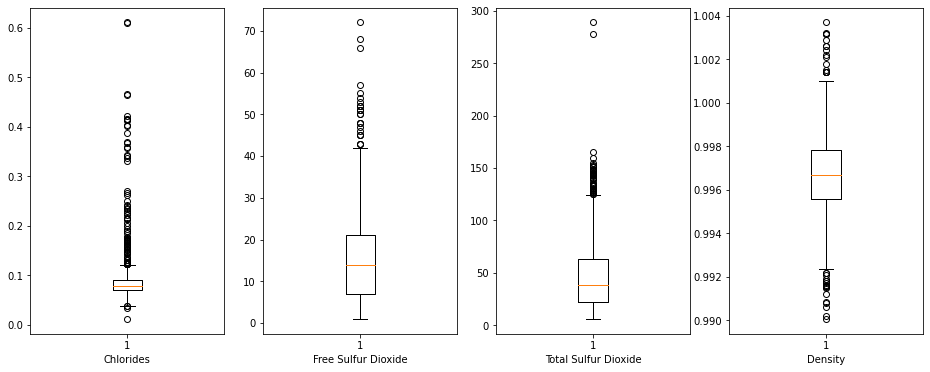

In [1440]:
fig, (ax5,ax6, ax7, ax8) = plt.subplots(1, 4, figsize=[16, 6])
ax5.boxplot(wineRed['chlorides'])
ax5.set_xlabel('Chlorides')
ax6.boxplot(wineRed['free sulfur dioxide'])
ax6.set_xlabel('Free Sulfur Dioxide')
ax7.boxplot(wineRed['total sulfur dioxide'])
ax7.set_xlabel('Total Sulfur Dioxide')
ax8.boxplot(wineRed['density'])
ax8.set_xlabel('Density')
plt.show()

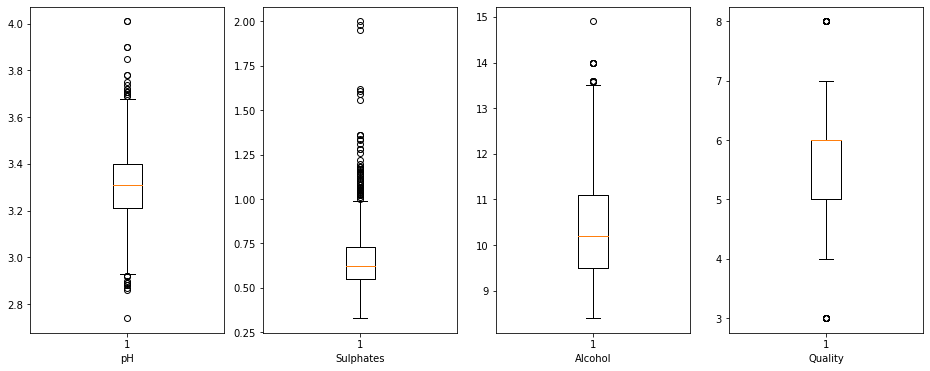

In [1441]:
fig, (ax9,ax10, ax11, ax12) = plt.subplots(1, 4, figsize=[16, 6])
ax9.boxplot(wineRed['pH'])
ax9.set_xlabel('pH')
ax10.boxplot(wineRed['sulphates'])
ax10.set_xlabel('Sulphates')
ax11.boxplot(wineRed['alcohol'])
ax11.set_xlabel('Alcohol')
ax12.boxplot(wineRed['quality'])
ax12.set_xlabel('Quality')
plt.show()

### Histogram

#### White Wine

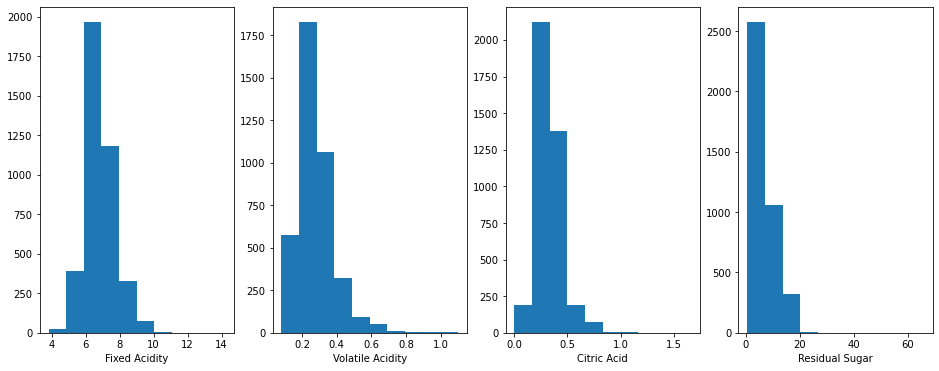

In [1442]:
fig, (ax1,ax2, ax3, ax4) = plt.subplots(1, 4, figsize=[16, 6])
ax1.hist(wineWhite['fixed acidity'])
ax1.set_xlabel('Fixed Acidity')
ax2.hist(wineWhite['volatile acidity'])
ax2.set_xlabel('Volatile Acidity')
ax3.hist(wineWhite['citric acid'])
ax3.set_xlabel('Citric Acid')
ax4.hist(wineWhite['residual sugar'])
ax4.set_xlabel('Residual Sugar')
plt.show()

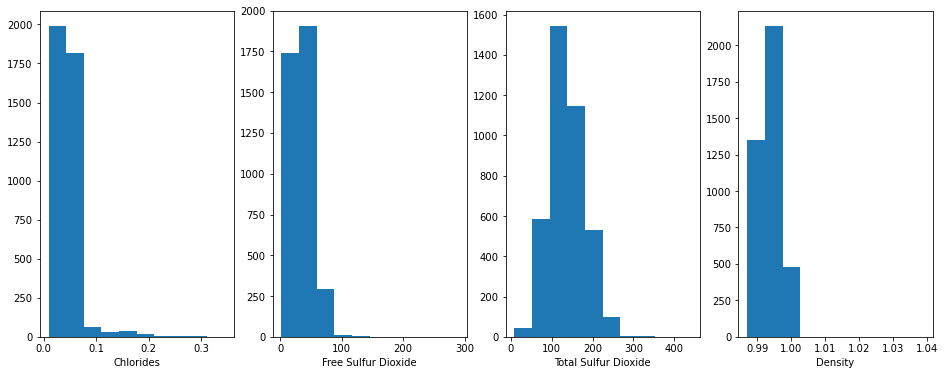

In [1443]:
fig, (ax5,ax6, ax7, ax8) = plt.subplots(1, 4, figsize=[16, 6])
ax5.hist(wineWhite['chlorides'])
ax5.set_xlabel('Chlorides')
ax6.hist(wineWhite['free sulfur dioxide'])
ax6.set_xlabel('Free Sulfur Dioxide')
ax7.hist(wineWhite['total sulfur dioxide'])
ax7.set_xlabel('Total Sulfur Dioxide')
ax8.hist(wineWhite['density'])
ax8.set_xlabel('Density')
plt.show()

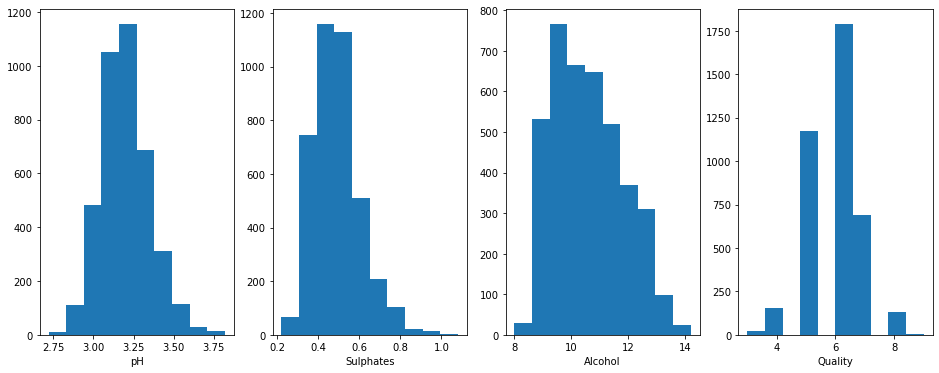

In [1444]:
fig, (ax9,ax10, ax11, ax12) = plt.subplots(1, 4, figsize=[16, 6])
ax9.hist(wineWhite['pH'])
ax9.set_xlabel('pH')
ax10.hist(wineWhite['sulphates'])
ax10.set_xlabel('Sulphates')
ax11.hist(wineWhite['alcohol'])
ax11.set_xlabel('Alcohol')
ax12.hist(wineWhite['quality'])
ax12.set_xlabel('Quality')
plt.show()

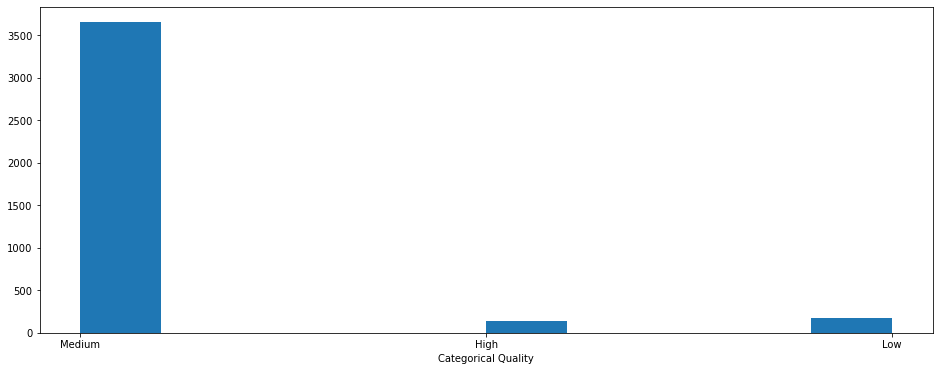

In [1445]:
fig, ax13 = plt.subplots(1, 1, figsize=[16, 6])
ax13.hist(wineWhite['Categorical Quality'])
ax13.set_xlabel('Categorical Quality')
plt.show()

#### Red Wine

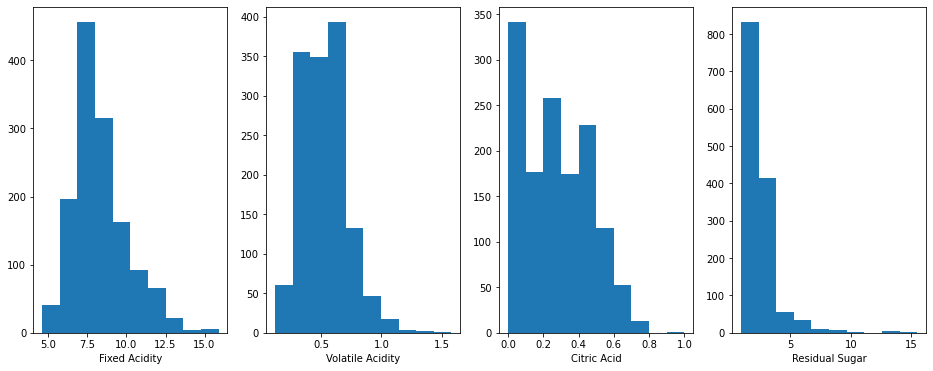

In [1446]:
fig, (ax1,ax2, ax3, ax4) = plt.subplots(1, 4, figsize=[16, 6])
ax1.hist(wineRed['fixed acidity'])
ax1.set_xlabel('Fixed Acidity')
ax2.hist(wineRed['volatile acidity'])
ax2.set_xlabel('Volatile Acidity')
ax3.hist(wineRed['citric acid'])
ax3.set_xlabel('Citric Acid')
ax4.hist(wineRed['residual sugar'])
ax4.set_xlabel('Residual Sugar')
plt.show()

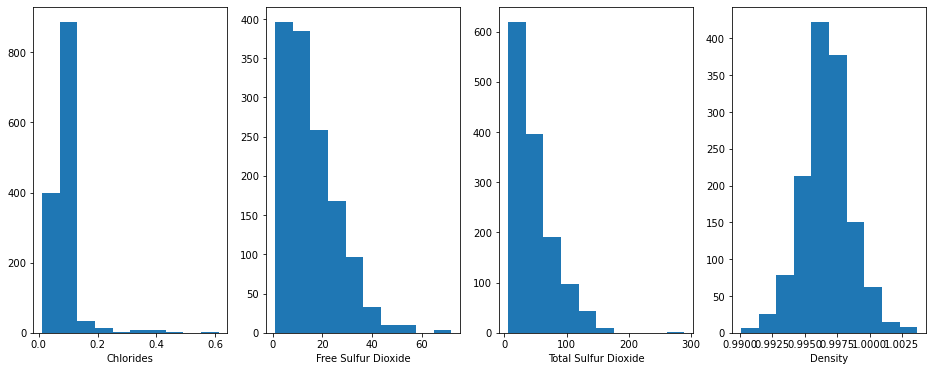

In [1447]:
fig, (ax5,ax6, ax7, ax8) = plt.subplots(1, 4, figsize=[16, 6])
ax5.hist(wineRed['chlorides'])
ax5.set_xlabel('Chlorides')
ax6.hist(wineRed['free sulfur dioxide'])
ax6.set_xlabel('Free Sulfur Dioxide')
ax7.hist(wineRed['total sulfur dioxide'])
ax7.set_xlabel('Total Sulfur Dioxide')
ax8.hist(wineRed['density'])
ax8.set_xlabel('Density')
plt.show()

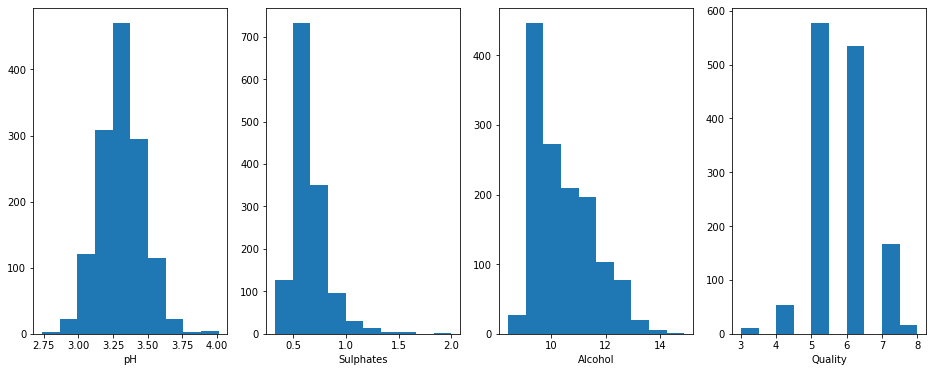

In [1448]:
fig, (ax9,ax10, ax11, ax12) = plt.subplots(1, 4, figsize=[16, 6])
ax9.hist(wineRed['pH'])
ax9.set_xlabel('pH')
ax10.hist(wineRed['sulphates'])
ax10.set_xlabel('Sulphates')
ax11.hist(wineRed['alcohol'])
ax11.set_xlabel('Alcohol')
ax12.hist(wineRed['quality'])
ax12.set_xlabel('Quality')
plt.show()

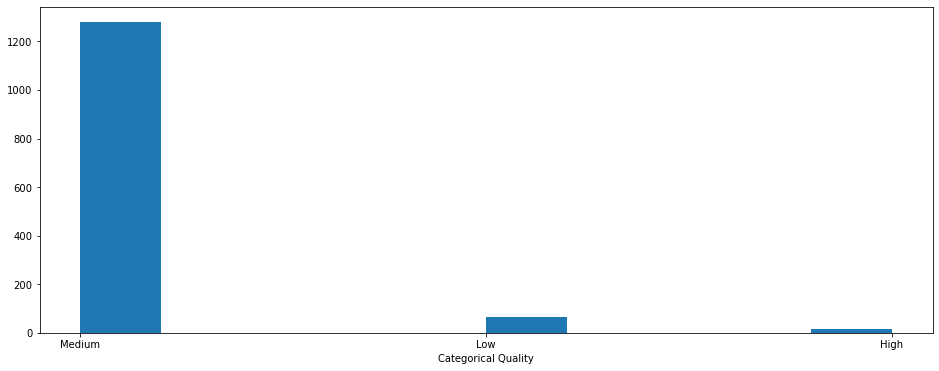

In [1449]:
fig, ax13 = plt.subplots(1, 1, figsize=[16, 6])
ax13.hist(wineRed['Categorical Quality'])
ax13.set_xlabel('Categorical Quality')
plt.show()

### EDA

In [1450]:
wineRed.corr() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.0000,-0.2551,0.6674,0.1110,0.0859,-0.1406,-0.1038,0.6702,-0.6867,0.1903,-0.0616,0.1190
volatile acidity,-0.2551,1.0000,-0.5512,-0.0024,0.0552,-0.0209,0.0717,0.0239,0.2471,-0.2569,-0.1978,-0.3952
citric acid,0.6674,-0.5512,1.0000,0.1439,0.2102,-0.0480,0.0474,0.3580,-0.5503,0.3261,0.1051,0.2281
residual sugar,0.1110,-0.0024,0.1439,1.0000,0.0267,0.1605,0.2010,0.3245,-0.0831,-0.0118,0.0633,0.0136
chlorides,0.0859,0.0552,0.2102,0.0267,1.0000,0.0007,0.0458,0.1936,-0.2709,0.3946,-0.2238,-0.1310
free sulfur dioxide,-0.1406,-0.0209,-0.0480,0.1605,0.0007,1.0000,0.6672,-0.0181,0.0566,0.0541,-0.0801,-0.0505
total sulfur dioxide,-0.1038,0.0717,0.0474,0.2010,0.0458,0.6672,1.0000,0.0781,-0.0793,0.0353,-0.2178,-0.1779
density,0.6702,0.0239,0.3580,0.3245,0.1936,-0.0181,0.0781,1.0000,-0.3556,0.1460,-0.5050,-0.1843
pH,-0.6867,0.2471,-0.5503,-0.0831,-0.2709,0.0566,-0.0793,-0.3556,1.0000,-0.2141,0.2134,-0.0552
sulphates,0.1903,-0.2569,0.3261,-0.0118,0.3946,0.0541,0.0353,0.1460,-0.2141,1.0000,0.0916,0.2488


In [1451]:
wineWhite.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.0000,-0.0192,0.2990,0.0836,0.0240,-0.0584,0.0824,0.2661,-0.4313,-0.0175,-0.1108,-0.1246
volatile acidity,-0.0192,1.0000,-0.1632,0.0983,0.0863,-0.1025,0.1023,0.0606,-0.0470,-0.0212,0.0468,-0.1907
citric acid,0.2990,-0.1632,1.0000,0.1063,0.1326,0.0917,0.1228,0.1601,-0.1830,0.0494,-0.0765,0.0071
residual sugar,0.0836,0.0983,0.1063,1.0000,0.0761,0.3068,0.4096,0.8205,-0.1660,-0.0205,-0.3982,-0.1173
chlorides,0.0240,0.0863,0.1326,0.0761,1.0000,0.1013,0.1911,0.2531,-0.0906,0.0179,-0.3569,-0.2177
free sulfur dioxide,-0.0584,-0.1025,0.0917,0.3068,0.1013,1.0000,0.6194,0.2946,-0.0077,0.0379,-0.2518,0.0105
total sulfur dioxide,0.0824,0.1023,0.1228,0.4096,0.1911,0.6194,1.0000,0.5369,0.0082,0.1365,-0.4466,-0.1834
density,0.2661,0.0606,0.1601,0.8205,0.2531,0.2946,0.5369,1.0000,-0.0637,0.0820,-0.7602,-0.3378
pH,-0.4313,-0.0470,-0.1830,-0.1660,-0.0906,-0.0077,0.0082,-0.0637,1.0000,0.1424,0.0931,0.1238
sulphates,-0.0175,-0.0212,0.0494,-0.0205,0.0179,0.0379,0.1365,0.0820,0.1424,1.0000,-0.0228,0.0532


In [1452]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(12, 12))
corr = wineRed.corr()
corr.style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


In [1453]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(12, 12))
corr = wineWhite.corr()
corr.style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.019214,0.298959,0.083620,0.024036,-0.058396,0.082425,0.266091,-0.431274,-0.017453,-0.110788,-0.124636
volatile acidity,-0.019214,1.000000,-0.163228,0.098340,0.086287,-0.102471,0.102315,0.060603,-0.046954,-0.021150,0.046815,-0.190678
citric acid,0.298959,-0.163228,1.000000,0.106269,0.132590,0.091681,0.122845,0.160076,-0.183015,0.049442,-0.076514,0.007065
residual sugar,0.083620,0.098340,0.106269,1.000000,0.076091,0.306835,0.409583,0.820498,-0.165997,-0.020503,-0.398167,-0.117339
chlorides,0.024036,0.086287,0.132590,0.076091,1.000000,0.101272,0.191145,0.253088,-0.090573,0.017871,-0.356928,-0.217739
free sulfur dioxide,-0.058396,-0.102471,0.091681,0.306835,0.101272,1.000000,0.619437,0.294638,-0.007750,0.037932,-0.251768,0.010507
total sulfur dioxide,0.082425,0.102315,0.122845,0.409583,0.191145,0.619437,1.000000,0.536868,0.008239,0.136544,-0.446643,-0.183356
density,0.266091,0.060603,0.160076,0.820498,0.253088,0.294638,0.536868,1.000000,-0.063734,0.082048,-0.760162,-0.337805
pH,-0.431274,-0.046954,-0.183015,-0.165997,-0.090573,-0.007750,0.008239,-0.063734,1.000000,0.142353,0.093095,0.123829
sulphates,-0.017453,-0.021150,0.049442,-0.020503,0.017871,0.037932,0.136544,0.082048,0.142353,1.000000,-0.022850,0.053200


### Quality vs Alcohol Scatterplot

Text(0.5, 1.0, 'Quality vs Alcohol Red Wine')

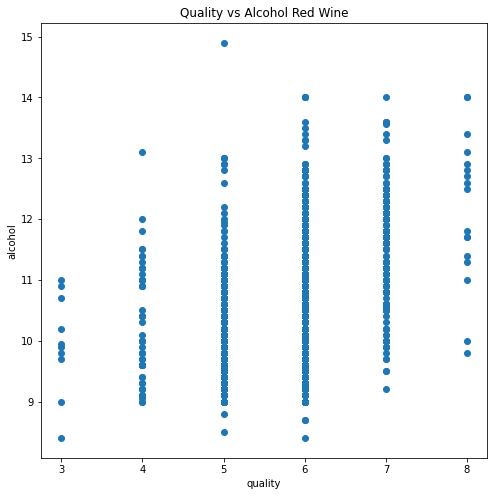

In [1454]:
fig, a1 = plt.subplots(1, 1, figsize=[8, 8])

a1.scatter(wineRed['quality'], wineRed['alcohol'])
plt.ylabel('alcohol')
plt.xlabel('quality')
plt.title('Quality vs Alcohol Red Wine')

Text(0.5, 1.0, 'Quality vs Alcohol White Wine')

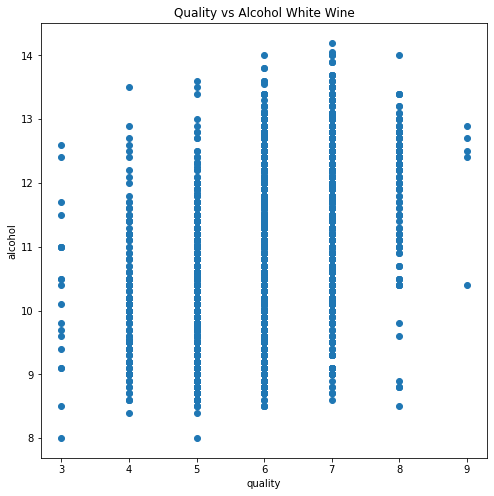

In [1455]:
fig, a1 = plt.subplots(1, 1, figsize=[8, 8])

a1.scatter(wineWhite['quality'], wineWhite['alcohol'])
plt.ylabel('alcohol')
plt.xlabel('quality')
plt.title('Quality vs Alcohol White Wine')

### Quality vs Volatile acidity Scatterplot

Text(0.5, 1.0, 'Quality vs Volatile Acidity Red Wine')

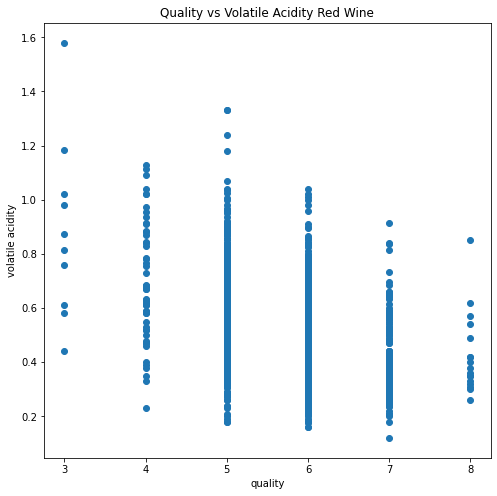

In [1456]:
fig, a1 = plt.subplots(1, 1, figsize=[8, 8])

a1.scatter(wineRed['quality'], wineRed['volatile acidity'])
plt.ylabel('volatile acidity')
plt.xlabel('quality')
plt.title('Quality vs Volatile Acidity Red Wine')

Text(0.5, 1.0, 'Quality vs Volatile Acidity White Wine')

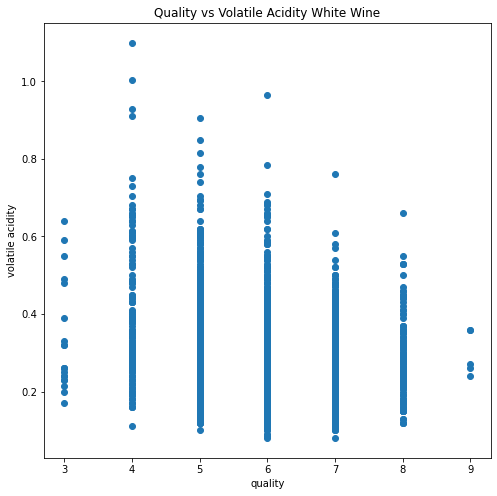

In [1457]:
fig, a1 = plt.subplots(1, 1, figsize=[8, 8])

a1.scatter(wineWhite['quality'], wineWhite['volatile acidity'])
plt.ylabel('volatile acidity')
plt.xlabel('quality')
plt.title('Quality vs Volatile Acidity White Wine')

### Quality vs Density Scatterplot

Text(0.5, 1.0, 'Quality vs Density White Wine')

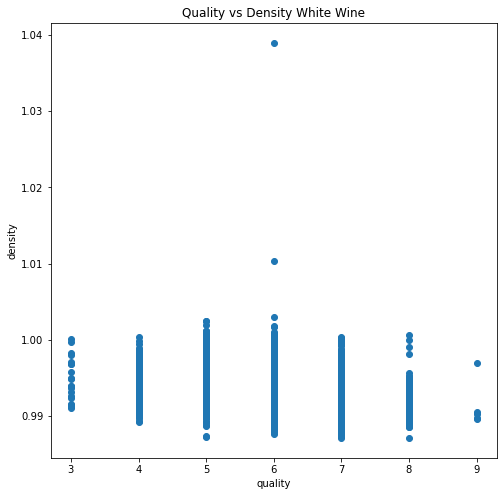

In [1458]:
fig, a1 = plt.subplots(1, 1, figsize=[8, 8])

a1.scatter(wineWhite['quality'], wineWhite['density'])
plt.ylabel('density')
plt.xlabel('quality')
plt.title('Quality vs Density White Wine')

Text(0.5, 1.0, 'Quality vs Density Red Wine')

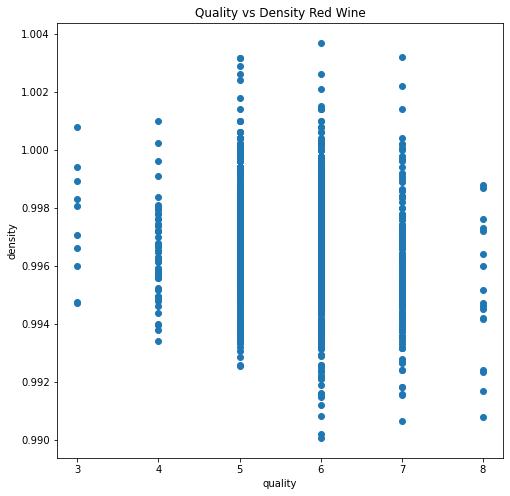

In [1459]:
fig, a1 = plt.subplots(1, 1, figsize=[8, 8])

a1.scatter(wineRed['quality'], wineRed['density'])
plt.ylabel('density')
plt.xlabel('quality')
plt.title('Quality vs Density Red Wine')

### Density with Residual Sugar

[]

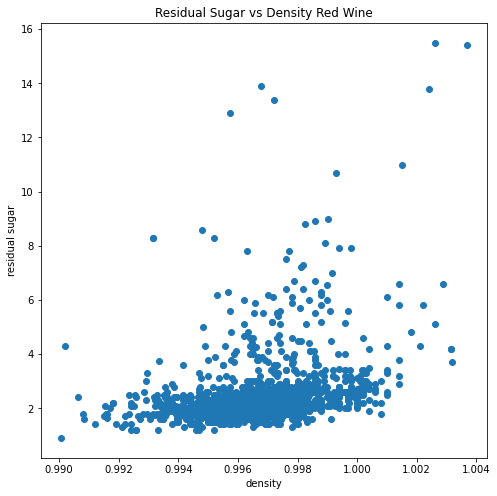

In [1460]:
fig, a1 = plt.subplots(1, 1, figsize=[8, 8])

a1.scatter(wineRed['density'], wineRed['residual sugar'])
plt.ylabel('residual sugar')
plt.xlabel('density')
plt.title('Residual Sugar vs Density Red Wine')

plt.plot()

Text(0.5, 1.0, 'Residual Sugar vs Density White Wine')

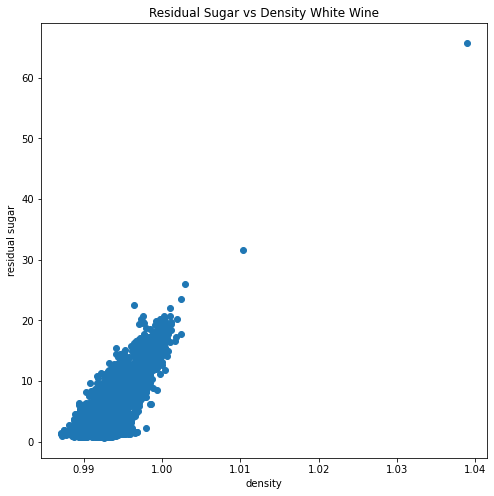

In [1461]:
fig, a1 = plt.subplots(1, 1, figsize=[8, 8])

a1.scatter(wineWhite['density'], wineWhite['residual sugar'])
plt.ylabel('residual sugar')
plt.xlabel('density')
plt.title('Residual Sugar vs Density White Wine')

### Alcohol vs Density

Text(0.5, 1.0, 'Alcohol vs Density White Wine')

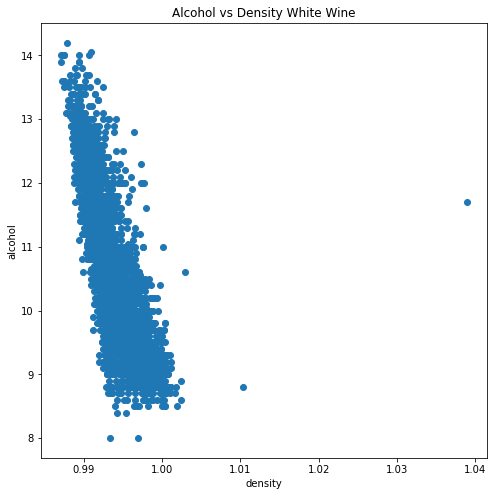

In [1462]:
fig, a1 = plt.subplots(1, 1, figsize=[8, 8])

a1.scatter(wineWhite['density'], wineWhite['alcohol'])
plt.ylabel('alcohol')
plt.xlabel('density')
plt.title('Alcohol vs Density White Wine')

Text(0.5, 1.0, 'Alcohol vs Density Red Wine')

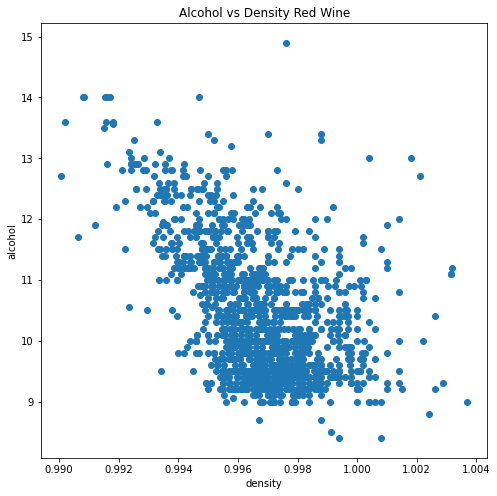

In [1463]:
fig, a1 = plt.subplots(1, 1, figsize=[8, 8])

a1.scatter(wineRed['density'], wineRed['alcohol'])
plt.ylabel('alcohol')
plt.xlabel('density')
plt.title('Alcohol vs Density Red Wine')

### Fixed Acidity vs Density

Text(0.5, 1.0, 'Fixed Acidity vs Density Red Wine')

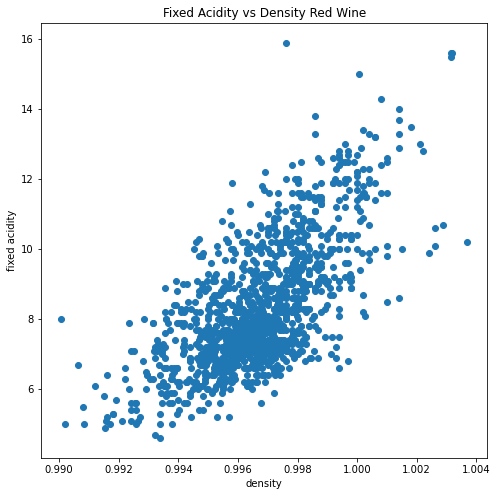

In [1464]:
fig, a1 = plt.subplots(1, 1, figsize=[8, 8])

a1.scatter(wineRed['density'], wineRed['fixed acidity'])
plt.ylabel('fixed acidity')
plt.xlabel('density')
plt.title('Fixed Acidity vs Density Red Wine')

Text(0.5, 1.0, 'Fixed Acidity vs Density White Wine')

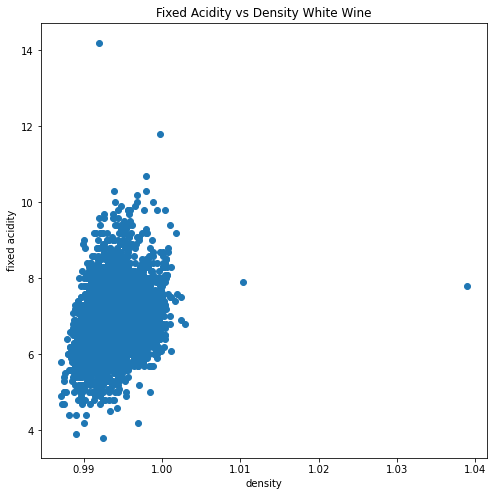

In [1465]:
fig, a1 = plt.subplots(1, 1, figsize=[8, 8])

a1.scatter(wineWhite['density'], wineWhite['fixed acidity'])
plt.ylabel('fixed acidity')
plt.xlabel('density')
plt.title('Fixed Acidity vs Density White Wine')

### Citric Acid vs Fixed Acidity 

Text(0.5, 1.0, 'Fixed Acidity vs Citric Acid Red Wine')

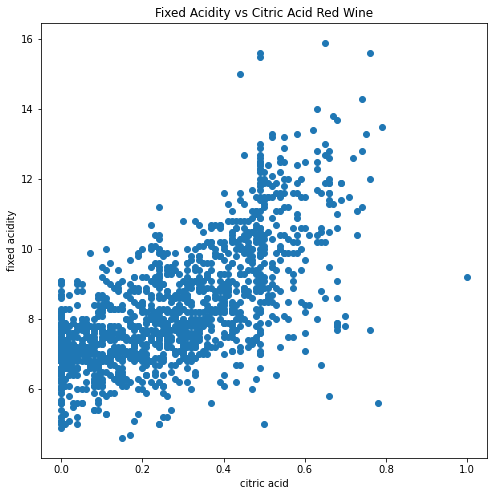

In [1466]:
fig, a1 = plt.subplots(1, 1, figsize=[8, 8])

a1.scatter(wineRed['citric acid'], wineRed['fixed acidity'])
plt.ylabel('fixed acidity')
plt.xlabel('citric acid')
plt.title('Fixed Acidity vs Citric Acid Red Wine')

Text(0.5, 1.0, 'Fixed Acidity vs Citric Acid White Wine')

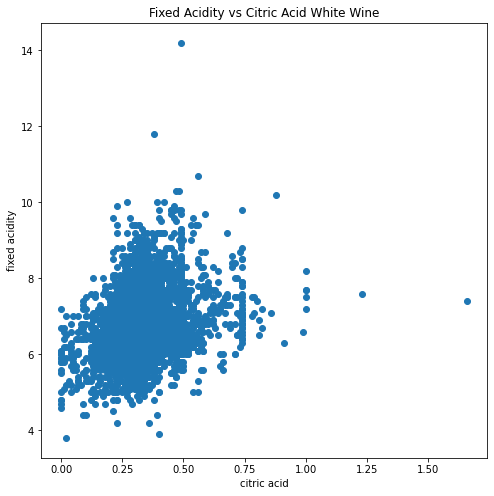

In [1467]:
fig, a1 = plt.subplots(1, 1, figsize=[8, 8])

a1.scatter(wineWhite['citric acid'], wineWhite['fixed acidity'])
plt.ylabel('fixed acidity')
plt.xlabel('citric acid')
plt.title('Fixed Acidity vs Citric Acid White Wine')

### pH vs Fixed Acidity

Text(0.5, 1.0, 'Fixed Acidity vs pH White Wine')

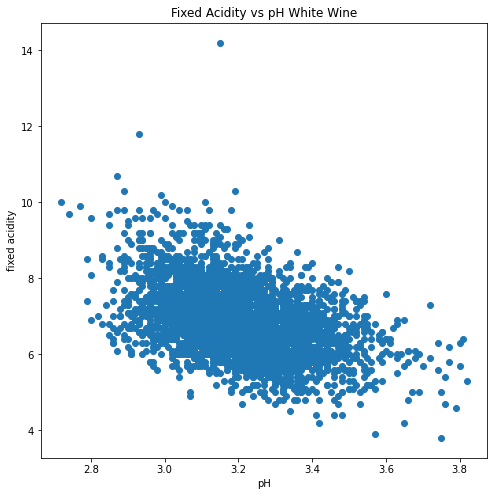

In [1468]:
fig, a1 = plt.subplots(1, 1, figsize=[8, 8])

a1.scatter(wineWhite['pH'], wineWhite['fixed acidity'])
plt.ylabel('fixed acidity')
plt.xlabel('pH')
plt.title('Fixed Acidity vs pH White Wine')

Text(0.5, 1.0, 'Fixed Acidity vs pH Red Wine')

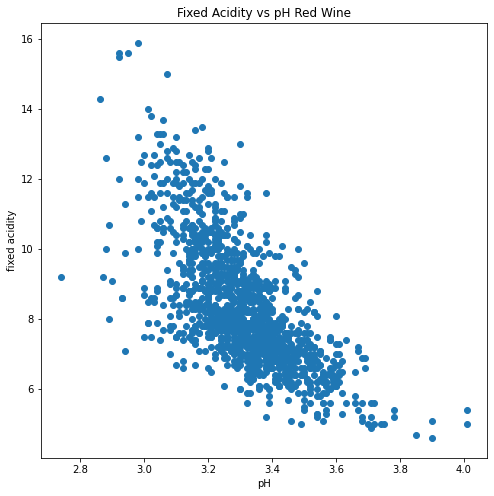

In [1469]:
fig, a1 = plt.subplots(1, 1, figsize=[8, 8])

a1.scatter(wineRed['pH'], wineRed['fixed acidity'])
plt.ylabel('fixed acidity')
plt.xlabel('pH')
plt.title('Fixed Acidity vs pH Red Wine')